Skylar Shafer
Econ 570 - Project Title: How Has Formula One Changed?
Group 19

In [1]:
import pandas as pd
import csv
import numpy as np
import math
import matplotlib.pyplot as plt

results = pd.read_csv('results.csv', encoding='utf-8')
drivers = pd.read_csv('drivers.csv', encoding='utf-8')
circuits = pd.read_csv('circuits.csv', encoding='utf-8')
races = pd.read_csv('races.csv', encoding='utf-8')

### Section 1: Data manipulation:
# The data came in the following format:
# results.csv: each individual racer's start and end results, speed, etc, with a raceid number attached to each given race
# races.csv: every race in f1 history, connecting with the raceid fore each, also present in in results 
# races.csv also had the circuitid of each race, connecting it to a given track, and the date of each race
# circuits.csv has the name of each track and it's associated circuitid, for labelling circuits
# driver.csv had driver id and name information, which i did not use
###
#
races['month'] = races.date.str[5:7]
races['day'] = races.date.str[8:10]
races = races.sort_values(['year','month','day'])
races = races.reset_index(drop=True)
races = races[races['year'] < 2022]
recent = races[races['year'] > 2013]
recent = recent[recent['year'] < 2022]

#the above section orders the races and results by date, because, annoyingly, the years are 
#all scrambled in the original dataset

races['raceId2'] = range(len(races))
#this raceid2 acts as the ordered raceid, or chronological-based id

modresults = results
modresults['position'] = pd.to_numeric(results['position'],errors = 'coerce')
modresults['grid'] = pd.to_numeric(results['grid'],errors = 'coerce')
modresults['position'] = modresults['position'].fillna(35.0)
modresults['grid'] = modresults['grid'].fillna(35.0)
modresults['circuitId'] = modresults['raceId'].map(races.set_index('raceId')['circuitId'])
#i used coercion and fillna to set nan values in starting position or ending position, to set a value for those who
#failed to finish for the sake of calculations that would cause an error otherwise
#i chose 35 because the maximum number of racers in a single race in f1 history is 34, so there will be no crossover


In [2]:
#Section 2: Data Preparation for Graphs

#this recentresults variable grabs only the races that have happened since 2014, for the later bar graphs
recentresults = modresults[modresults['raceId'].isin(recent['raceId'])]

length = len(races)
circlength = len(circuits)
listofcircuits = np.zeros((circlength))

#this for loop counts the number of races at each circuit, in history
for a in range(circlength):
    try:
        listofcircuits[a] = races['circuitId'].value_counts()[a+1]
    except:
        pass
vals = [0] * circlength
vals2 = [0] * circlength
vals3 = [0] * circlength
placeholder = 0

#this code chunk is used to create all the data for the entirety of F1's history, 
#for the bar graphs

for a in range(circlength):
    tempresults = modresults[modresults['circuitId'] == a+1]
    try:
        vals2[a] = tempresults['position'].value_counts()[35.0]/len(tempresults)
        #the above line counts the number of people who failed to finish
        comp = tempresults[tempresults['position'] == 35.0 ]
        vals3[a] = sum(comp['grid'])/len(comp)
        #above takes the average starting position of those who failed to finish
    except:
        placeholder = 35
    tempresults = tempresults[tempresults['grid'] < 35]
    tempresults = tempresults[tempresults['position'] < 35]
    #the above two lines remove those who didnt start or didnt finish
    listi = abs(tempresults['grid'] - tempresults['position'])
    #this line takes the change in starting to final position for each racer who finished
    try:
        vals[a] = listi.sum()/len(tempresults)
        #this takes the average change in position for all of these racers
    except:
        placeholder = 35
recent1 = [0] * circlength
recent2 = [0] * circlength
recent3 = [0] * circlength
placeholder = 0

#this code chunk is very similar, with the same complex details I examined above
#but instead only does so for the recent results since 2014,for the bar graphs

for a in range(circlength):
    tempresults = recentresults[recentresults['circuitId'] == a+1]
    try:
        recent2[a] = tempresults['position'].value_counts()[35.0]/len(tempresults)
        comp = tempresults[tempresults['position'] == 35.0 ]
        recent3[a] = sum(comp['grid'])/len(comp)
    except:
        placeholder = 35
    tempresults = tempresults[tempresults['grid'] < 35]
    tempresults = tempresults[tempresults['position'] < 35]
    listi = abs(tempresults['grid'] - tempresults['position'])
    try:
        recent1[a] = listi.sum()/len(tempresults)
    except:
        placeholder = 35


racelist = [] * len(races)
racelist2 = [] * len(races)
racelist3 = [] * len(races)
yearlist = []
yearlistindexes = []
yearlist2 = []
yearlist2indexes = []
yearlist3 = []
yearlist3indexes = []
value = 0


#this code chunk creates the chronological order data for the lineplots of F1's entire history for
#the given variables

for t in range(len(races)):
    tempid = races['raceId'][t]
    #taking the active raceid
    halfway = modresults[modresults['raceId'] == tempid]
    #taking only the results for this race
    try:
        if halfway['position'].value_counts()[35.0]/len(halfway) != 0:
            racelist2.append(halfway['position'].value_counts()[35.0]/len(halfway))
            #getting the proportion of racers who did not finish
            if races['year'][t] not in yearlist2:
                yearlist2.append(races['year'][t])
                yearlist2indexes.append(value)
                #appending years for indexing later
    except:
        pass
    comp = halfway[halfway['position'] == 35.0 ]
    #taking the non-finishers
    
    try:
        if sum(comp['grid'])/len(comp) != 0:
            racelist3.append(sum(comp['grid'])/len(comp))
            #taking average starting position of non-finishers
            if races['year'][t] not in yearlist3:
                yearlist3.append(races['year'][t])
                yearlist3indexes.append(value)
                #appending years for indexing later
    except:
        pass
    halfway = halfway[halfway['grid'] < 35]
    halfway = halfway[halfway['position'] < 35]
    listi = abs(halfway['grid'] - halfway['position'])
    #taking only racers who finished, and their change in position
    
    try:
        if listi.sum()/len(halfway) != 0:
            racelist.append(listi.sum()/len(halfway))
            #appending the average change in position for finishers
            if races['year'][t] not in yearlist:
                yearlist.append(races['year'][t])
                yearlistindexes.append(value)
                #appending years for indexing later
        
    except:
        pass
    value += 1
    
#this set of code is for the bar charts of historic F1 results, where it 
#cuts the data down to only circuits with over 30 F1 races in their history

dictionary = {}
dictionary2 = {}
dictionary3 = {}
dictionary4 = {}
for a in range(len(vals)):
    if math.isnan(vals[a]):
        continue
    elif listofcircuits[a] <= 30:
        continue
    else:
        dictionary.update({circuits.loc[a,'name']:vals[a]})
for b in range(len(vals2)):
    if math.isnan(vals2[b]):
        continue
    elif listofcircuits[b] <= 30:
        continue
    else:
        dictionary2.update({circuits.loc[b,'name']:vals2[b]})
for c in range(len(vals3)):
    if math.isnan(vals3[c]):
        continue
    elif listofcircuits[c] <= 30:
        continue
    else:
        dictionary3.update({circuits.loc[c,'name']:vals3[c]})
        
#this set of code is the same, but for recent results, it 
#cuts the data down to only circuits with over 30 F1 races in their history

rdictionary = {}
rdictionary2 = {}
rdictionary3 = {}
for a in range(len(recent1)):
    if math.isnan(recent1[a]):
        continue
    elif listofcircuits[a] <= 30:
        continue
    else:
        try:
            rdictionary.update({circuits.loc[a,'name']:recent1[a]})
        except:
            pass
for b in range(len(recent2)):
    if math.isnan(recent2[b]):
        continue
    elif listofcircuits[b] <= 30:
        continue
    else:
        try:
            rdictionary2.update({circuits.loc[b,'name']:recent2[b]})
        except:
            pass
for c in range(len(recent3)):
    if math.isnan(recent3[c]):
        continue
    elif listofcircuits[c] <= 30:
        continue
    else:
        try:
            rdictionary3.update({circuits.loc[c,'name']:recent3[c]}) 
        except:
            pass


C:\Users\shafe\AppData\Local\Temp/ipykernel_24528/3188098437.py:40: RuntimeWarning: invalid value encountered in double_scalars
  vals[a] = listi.sum()/len(tempresults)
C:\Users\shafe\AppData\Local\Temp/ipykernel_24528/3188098437.py:64: RuntimeWarning: invalid value encountered in double_scalars
  recent1[a] = listi.sum()/len(tempresults)


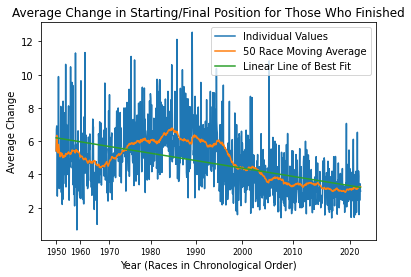

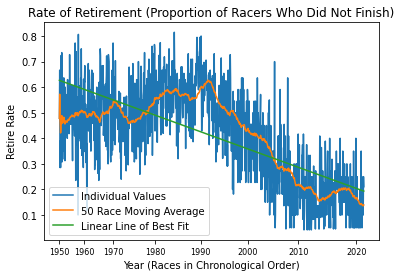

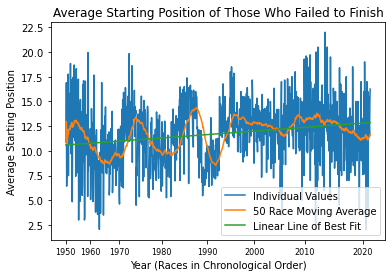

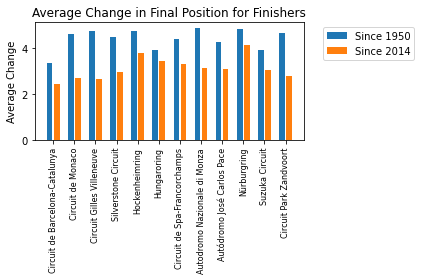

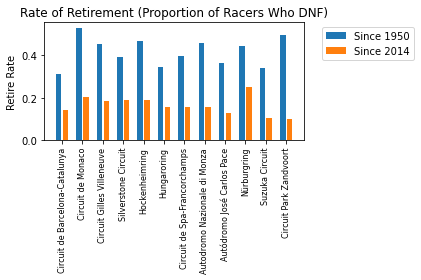

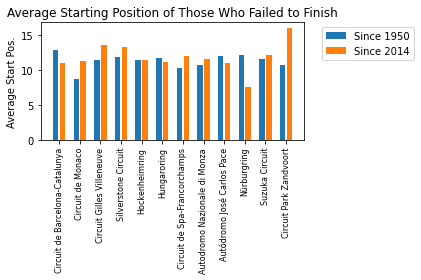

In [3]:
#Section 3: Graphing

#This is a function that just calculates the moving average for a given dataset, thus producing
#a line that is easier to graph, with less extreme variation
def movingaverage(listi,rollperiod):
    listi2 = []
    for x in range(len(listi)):
        if x < rollperiod:
            templist = listi[:x+1]
        else:
            templist = listi[x+1-rollperiod:x+1]
        aver = sum(templist)/len(templist)
        listi2.append(aver)
    return listi2

#This part below is long, but just basic plotting

#first are the line plots for the 3 variables
#i used polyfit to create a line of best fit, and the moving average function
#to smooth the data

yearlist = sorted(yearlist)
difference = yearlist[-1] - yearlist[0] 
racelist = [z for z in racelist if str(z) != 'nan']
racelist2 = [z for z in racelist2 if str(z) != 'nan']
racelist3 = [z for z in racelist3 if str(z) != 'nan']
fig,ax = plt.subplots()
plt.plot(range(len(racelist)),racelist,label="Individual Values")
plt.plot(range(len(racelist)),movingaverage(racelist,50),label = "50 Race Moving Average")
xx, yy = np.polyfit(range(len(racelist)),racelist, 1)
plt.plot(range(len(racelist)),xx*range(len(racelist))+yy,label="Linear Line of Best Fit")
plt.xticks(yearlistindexes[0::10],yearlist[0::10],fontsize = 8)
plt.ylabel("Average Change")
plt.xlabel("Year (Races in Chronological Order)")
plt.title("Average Change in Starting/Final Position for Those Who Finished")
plt.legend(loc="upper right")
plt.savefig("term11.svg")
plt.show()
plt.plot(range(len(racelist2)),racelist2,label="Individual Values")
plt.plot(range(len(racelist2)),movingaverage(racelist2,50), label= "50 Race Moving Average")
xx, yy = np.polyfit(range(len(racelist2)),racelist2, 1)
plt.plot(range(len(racelist2)),xx*range(len(racelist2))+yy, label="Linear Line of Best Fit")
plt.xticks(yearlistindexes[0::10],yearlist[0::10],fontsize = 8)
plt.ylabel("Retire Rate")
plt.xlabel("Year (Races in Chronological Order)")
plt.title("Rate of Retirement (Proportion of Racers Who Did Not Finish)")
plt.legend(loc="lower left")
plt.savefig("term12.svg")
plt.show()
plt.plot(range(len(racelist3)),racelist3, label= "Individual Values")
plt.plot(range(len(racelist3)),movingaverage(racelist3,50), label = "50 Race Moving Average")
xx, yy = np.polyfit(range(len(racelist3)),racelist3, 1)
plt.plot(range(len(racelist3)),xx*range(len(racelist3))+yy, label="Linear Line of Best Fit")
plt.xticks(yearlistindexes[0::10],yearlist[0::10],fontsize = 8)
plt.ylabel("Average Starting Position")
plt.xlabel("Year (Races in Chronological Order)")
plt.title("Average Starting Position of Those Who Failed to Finish")
plt.legend(loc="lower right")
plt.savefig("term13.svg")
plt.show()


#now we have the bar plots for the 3 variables

width = .5
widthset1 = list(range(len(dictionary)))
listofwidths = []
listofwidths2 = []
for x in range(len(dictionary)):
    listofwidths.append(3*x-width)
for x in range(len(dictionary)):
    listofwidths2.append(3*x+width)  
plt.bar(listofwidths,list(dictionary.values()),label = "Since 1950")
plt.bar(listofwidths2,list(rdictionary.values()),label="Since 2014")
plt.xticks(range(0,len(dictionary)*3,3),dictionary.keys(),rotation=90,fontsize = 8)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel("Average Change")
plt.title("Average Change in Final Position for Finishers")
plt.tight_layout()
plt.savefig("term21.svg")
plt.show()
plt.bar(listofwidths,list(dictionary2.values()),label="Since 1950")
plt.bar(listofwidths2,list(rdictionary2.values()),label="Since 2014")
plt.xticks(range(0,len(dictionary)*3,3),dictionary.keys(),rotation=90,fontsize = 8)
plt.ylabel("Retire Rate")
plt.title("Rate of Retirement (Proportion of Racers Who DNF)")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("term22.svg")
plt.show()
plt.bar(listofwidths,list(dictionary3.values()),label= "Since 1950")
plt.bar(listofwidths2,list(rdictionary3.values()),label = "Since 2014")
plt.xticks(range(0,len(dictionary)*3,3),dictionary.keys(),rotation=90,fontsize = 8)
plt.ylabel("Average Start Pos.")
plt.title("Average Starting Position of Those Who Failed to Finish")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("term23.svg")
plt.show()

#i hope you enjoyed this project!
